# **Housing Prices Prediction using Regression**

In the real estate market, accurately predicting house prices is crucial for buyers, sellers, real estate agents, and financial institutions. Many factors influence property values, including location, size, quality, and various structural features. Machine learning techniques can help uncover complex relationships between these variables and provide reliable price estimations.

This project uses a real-world housing dataset to build and evaluate multiple regression models capable of predicting house sale prices. The analysis covers the full machine learning pipeline, including data cleaning, feature selection based on correlation analysis, categorical encoding, model comparison, and pipeline deployment.

Multiple models were compared — including Linear Regression, Ridge, Lasso, and ElasticNet. The final solution includes a fully functional machine learning pipeline ready for future data predictions.


## 🎯 Objectives

This project aims to:

- Predict house sale prices using supervised machine learning regression models.
- Perform comprehensive data cleaning, handling missing values and removing irrelevant features.
- Conduct feature selection based on correlation analysis to reduce noise and multicollinearity.
- Apply appropriate encoding techniques for categorical variables (binary encoding and one-hot encoding).
- Train and compare multiple regression algorithms.
- Evaluate model performance using key regression metrics: MAE, RMSE, and R².
- Build a final reusable machine learning pipeline for future data predictions.


---
## Table of Contents
1. Data Loading
2. Data Cleaning and Wrangling
3. Exploratory Data Analysis
4. Data Processing
5. Model Training and Evaluation
6. Final Pipeline Implementation
7. Final Conclusion
---

## 1. Data Loading 📂

Import Libraries:

In [1]:
# For data manipulation and tabular data analysis:
import pandas as pd 

# For efficient numerical computations and array operations:
import numpy as np

# For data visualization and exploratory analysis through plots and graphs:
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)


We begin by importing the dataset into a Pandas DataFrame to explore its structure and contents. The initial inspection helps identify the format, shape, and any potential issues such as missing values or incorrect data types.

In [4]:
df = pd.read_csv('C:/Users/CJB2/Downloads/train.csv')

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


***Data Loading completed ✅***

## 2. Data Cleaning and Wrangling 🧹

In this section, we inspect the dataset to identify issues that could affect modeling, such as incorrect data types or formatting inconsistencies. We use `.info()` to examine the structure of the dataset and detect incorrect types or non-numeric values. 

#### Overview
Using `.info()`, we confirm that the dataset has many features stored as object and numeric types. Identifying data types is crucial for proper encoding and preprocessing in later steps.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

So far, we can identify the presence of missing values across several features, which will require dedicated treatment during the cleaning process.


*Next, we identify the features containing those missing values.*

In [8]:
missing_values=df.isnull().sum()
missing_values=missing_values[missing_values>0].sort_values(ascending=False)
missing_values

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64

####  Missing Values Treatment

Missing values were handled based on the nature and context of each feature:

- For features representing optional property characteristics (e.g. pools, fences, garages, basements), missing values were replaced with descriptive strings indicating absence.
- For numerical features representing area or size (e.g. `MasVnrArea`), missing values were replaced with `0` to indicate no area.
- For features like `LotFrontage`, missing values were imputed using the median value within each neighborhood to better capture local patterns.
- For the `Electrical` feature, missing values were replaced with the most common class (`SBrkr`).

We can check the description on each code cell for more context:


---

In [10]:
# Replacing missing values for features indicating absence of a pool
df['PoolQC'].fillna('No Pool',inplace=True)

In [12]:
# Alley access not present
df['Alley'].fillna('No alley access', inplace=True)

In [14]:
# Fence not present
df['Fence'].fillna('No Fence', inplace=True)

In [16]:
# No masonry veneer type
df['MasVnrType'].fillna('None', inplace=True) #tipo

In [18]:
# No masonry veneer area (numeric -> set to zero)
df['MasVnrArea'].fillna(0, inplace=True)

In [20]:
# No fireplace
df['FireplaceQu'].fillna('No Fireplace', inplace=True)

In [22]:
# No garage present (applies to all related garage features)
df['GarageType'].fillna('No Garage', inplace=True)
df['GarageYrBlt'].fillna('No Garage', inplace=True)
df['GarageFinish'].fillna('No Garage', inplace=True)
df['GarageQual'].fillna('No Garage', inplace=True)
df['GarageCond'].fillna('No Garage', inplace=True)

In [24]:
# No basement present (applies to all related basement features)
df['BsmtFinType1'].fillna('No Basement', inplace=True)
df['BsmtFinType2'].fillna('No Basement', inplace=True)
df['BsmtExposure'].fillna('No Basement', inplace=True)
df['BsmtCond'].fillna('No Basement', inplace=True)
df['BsmtQual'].fillna('No Basement', inplace=True)

In [26]:
# For Electrical, fill with most common class
df['Electrical'].fillna('SBrkr', inplace=True)

In [28]:
# For LotFrontage, fill missing values with median per Neighborhood
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

Unlike other sparse features such as `Fence` or `PoolQC`, which have clear and consistent meanings when missing (e.g., "No Fence", "No Pool"), the values in `MiscFeature` are highly inconsistent and lack standard categories. Imputing them would introduce noise rather than clarity. For that reason, the column was not considered for cleaning and most likely to be droped.

---

*The dataset is now fully prepared for Exploratory Data Analysis (EDA).*

***Data Cleaning and Wrangling completed*** ✅

## 3. Exploratory Data Analysis 📊

In this section we performed exploratory data analysis to understand the structure of the dataset and the relationship between features and the target variable (`SalePrice`).

We begin by identifying the categorical features (`object` type) and analyzing how different categories influence average sale price. Then, we assess the numerical features by calculating their Pearson correlation with the target. This helped us identifying which variables had the strongest predictive potential, and remove those with weak or no correlation.

This step ensures that we build our model using the most relevant features, improving performance and reducing noise.


#### Categorical Features' Correlation

These are the columns stored as **object** type, which typically represent qualitative information such as zoning, material quality, or property configuration:

In [33]:
df.select_dtypes(include='object').columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

We then calculate the average sale price (`SalePrice`) for each category within these features using `groupby()`. This helps uncover which categorical variables have a strong impact on property value based on the variation in mean price across categories.


In [35]:
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    print(f'\n==={col}===')
    corr_cat=df.groupby(col)['SalePrice'].mean().sort_values(ascending=False) #mean_saleprice
    print(corr_cat)


===MSZoning===
MSZoning
FV         214014.061538
RL         191004.994787
RH         131558.375000
RM         126316.830275
C (all)     74528.000000
Name: SalePrice, dtype: float64

===Street===
Street
Pave    181130.538514
Grvl    130190.500000
Name: SalePrice, dtype: float64

===Alley===
Alley
No alley access    183452.131483
Pave               168000.585366
Grvl               122219.080000
Name: SalePrice, dtype: float64

===LotShape===
LotShape
IR2    239833.365854
IR3    216036.500000
IR1    206101.665289
Reg    164754.818378
Name: SalePrice, dtype: float64

===LandContour===
LandContour
HLS    231533.940000
Low    203661.111111
Lvl    180183.746758
Bnk    143104.079365
Name: SalePrice, dtype: float64

===Utilities===
Utilities
AllPub    180950.95682
NoSeWa    137500.00000
Name: SalePrice, dtype: float64

===LotConfig===
LotConfig
CulDSac    223854.617021
FR3        208475.000000
Corner     181623.425856
FR2        177934.574468
Inside     176938.047529
Name: SalePrice, dtype: fl

After reviewing the relationship between each categorical feature and the target variable (`SalePrice`), we selected only those that showed meaningful variation in average sale price across their categories.

Two categorical-related features were removed during data preparation due to weak relevance and data quality issues:

- **MiscFeature**: This column describes miscellaneous property features (e.g., tennis court, shed), but contains an overwhelming number of missing values and lacks consistent interpretation.

- **GarageYrBlt**: Although stored as a numerical feature, this column represents the year the garage was built and overlaps significantly with the house construction year (`YearBuilt`) in most cases.

To keep the notebook clean, the grouped outputs were not displayed here, but each feature was manually reviewed. The final selection was based on observed price variation and practical relevance to house value.


#### Numerical Features' Correlation

We examined the **Pearson** correlation between each numerical feature and the target variable (`SalePrice`), using a threshold to determine which features are relevant.

Features with a correlation between **-0.4** and **0.4** were considered to have weak linear relationships with the target and were dropped from the dataset. This helped uss reduce noise, eliminate redundant or weak predictors, and focus on variables with stronger predictive potential.

In [37]:
num_df=df.select_dtypes(include=['float','int'])
correlation=num_df.corr()['SalePrice']
print(correlation)

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.349876
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePrice, dtype: float64


#### Feature Filtering

Based on the previous correlation analysis, we removed features with weak or no relationship to the target variable (`SalePrice`), as well as columns considered redundant or uninformative.

This included:

- Features with low Pearson correlation (between -0.4 and 0.4)
- Columns with excessive missing values already deemed non-essential (`MiscFeature`)
- Identifiers like `Id` which do not contribute to prediction

After dropping these columns, the dataset was reduced from 81 to 58 features — resulting in a cleaner and more focused set of predictors.


In [39]:
df.drop(columns= ['Id', 'MiscFeature', 'LotFrontage', 'LotArea', 'BsmtFinSF1',
    'BsmtFinSF2', 'BsmtUnfSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath',
    'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
    'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
    'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold', 'GarageYrBlt'], inplace=True)

In [41]:
df.shape

(1460, 58)

We can confirm that from 81 we only ended up with 58 valide features.

#### Target Variable Distribution

We used a histogram that shows that house prices are **right-skewed** most properties are concentrated between 100,000 and 300,000, but a few high-priced houses extend up to \$755,000, creating a long tail.


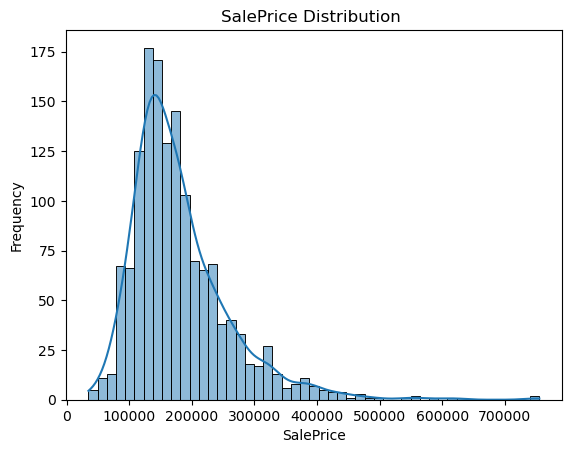

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['SalePrice'], kde=True)
plt.title("SalePrice Distribution ")
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.show()


The `.describe()` output confirms this pattern:

In [45]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

The skewed distribution has a direct impact on regression metrics:

- **MAE (Mean Absolute Error)** is less sensitive to outliers and gives a better sense of average error.
- **RMSE (Root Mean Squared Error)** amplifies the effect of large deviations due to its squaring, making it more influenced by high-priced outliers.
- Understanding the scale and variance of the target helps contextualize whether an error of, for example, \$20,000 is relatively large or small compared to the price range.

This analysis provides essential context when later interpreting model accuracy.

***Exploratory Data Analysis completed*** ✅

## 4. Data Processing 🛠️

To prepare the dataset for machine learning models, all categorical features need to be converted into numerical format.


#### Binary Encoding

For binary categorical features, we used simple mapping:

In [47]:
df['Street']=df['Street'].map({'Grvl':0, 'Pave':1})
df['CentralAir']=df['CentralAir'].map({'N':0, 'Y':1})

#### One-Hot Encoding

For features with multiple categories, one-hot encoding was applied instead. This creates a new **binary column** for each category while avoiding multicollinearity by dropping the first category.

In [49]:
cat_col=['MSZoning', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'SaleType', 'SaleCondition']

df=pd.get_dummies(df, columns=cat_col, drop_first=True)

In [51]:
df.shape

(1460, 235)

As we can see above, after encoding, the total number of features increased from **58** to **235**, reflecting the expansion of categorical variables into multiple binary indicators.

This transformation allows linear models to handle categorical information correctly during training.

#### Train-Test Split

The dataset was divided into **features** (X) and **target** (y), where X represent all predictor variables and y the target variable `SalePrice`.

In [53]:
y = df['SalePrice']

X = df.drop(columns=['SalePrice'])


To evaluate model performance, we split the data into training and testing sets using an 80/20 ratio. This ensures that the model is trained on a subset of the data and evaluated on unseen data, simulating real-world predictions.

The **random_state** parameter was set to 42 to guarantee reproducibility of results.

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

***Data Processing completed*** ✅

## 5. Model Traning and Evaluation 🖥️

In this section, we train several regression models to predict house sale prices based on property features. The models are evaluated using **error metrics** that quantify how close the predicted prices are to actual sale prices. The smaller the error, the more reliable the model becomes for business use. 

Reliable price predictions help set appropriate listing prices, assess property valuation for mortgages or loans, identify undervalued or overvalued assets and support data-driven investment decisions.


### Linear Model

We start by training a simple Linear Regression model as a baseline. This baseline model provides a reference point to compare the performance of more advanced models in the next steps.

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

LR = LinearRegression()
LR.fit(X_train, y_train)
y_pred=LR.predict(X_test)


The initial Linear Regression model achieved the following performance:

- **R² (Test):** 0.70  
- **Mean Absolute Error (MAE):** \$22,134  
- **Root Mean Squared Error (RMSE):** \$48,232

From a business perspective, this means that on average, predictions deviate around 22,000 from actual sale prices. Given that the average house price is around 180,000, this represents approximately **12% average error**, which is a reasonable starting point for many real estate valuation scenarios.

However, the higher RMSE suggests that there are still some larger individual errors. More advanced models may help reduce these larger deviations and improve overall stability.


In [59]:

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)


MAE: 22133.958753532483
MSE: 2326290326.2739716
RMSE: 48231.63200923199
R²: 0.696715594169355


We now try to check how the model is balancing the results between traning and testing:

In [61]:
r2_train = LR.score(X_train, y_train)

r2_test = LR.score(X_test, y_test)

print("R² train:", r2_train)
print("R² test:", r2_test)


R² train: 0.9299077520243804
R² test: 0.696715594169355


As we can see above, while the model fits the training data quite well (R² = 0.93), performance drops when predicting unseen data (R² = 0.70), indicating some degree of **overfitting**.

#### **We'll now experiment with a few more Regression algorithms**, including:

To improve the initial performance observed with Linear Regression, we'll now experiment with several alternative regression algorithms, including:

- **Ridge Regression**
- **Lasso Regression**
- **ElasticNet Regression**

Each model will be trained and evaluated using the same data splits and error metrics (MAE, RMSE, R²).

The goal is to identify which model provides the most accurate and stable price predictions. In particular, we aim to reduce large individual prediction errors (as reflected by RMSE), while maintaining strong overall explanatory power (R²).

After testing all candidates, we'll compare their results and select the most suitable model for deployment in a real-world scenario.

### Ridge Model

Since Ridge penalizes the magnitude of coefficients, it's important to ensure that all features are on the same scale. Without standardization, features with larger numerical ranges would disproportionately influence the penalty term, leading to suboptimal results.

For that reason, we applied **StandardScaler** to standardize all features before training the Ridge model. This transforms all variables to have zero mean and unit variance, allowing the regularization term to treat all features equally regardless of their original scale.

The model was then trained and predictions generated on the scaled test set.

In [63]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)

In [65]:
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("MAE (Ridge):", mae_ridge)
print("MSE (Ridge):", mse_ridge)
print("RMSE (Ridge):", rmse_ridge)
print("R² (Ridge):", r2_ridge)

MAE (Ridge): 21694.322381585236
MSE (Ridge): 2005190589.5620916
RMSE (Ridge): 44779.354501400434
R² (Ridge): 0.7385781861945819


### Lasso Model

In [67]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_model.predict(X_test_scaled)

In [69]:
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("MAE (Lasso):", mae_lasso)
print("MSE (Lasso):", mse_lasso)
print("RMSE (Lasso):", rmse_lasso)
print("R² (Lasso):", r2_lasso)


MAE (Lasso): 22079.050147649483
MSE (Lasso): 2310650433.081813
RMSE (Lasso): 48069.225426272606
R² (Lasso): 0.6987546069531274


### ElasticNet Model

In [71]:
from sklearn.linear_model import ElasticNet

elastic_model = ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=10000)
elastic_model.fit(X_train_scaled, y_train)
y_pred_elastic = elastic_model.predict(X_test_scaled)

In [73]:
mae_elastic = mean_absolute_error(y_test, y_pred_elastic)
mse_elastic = mean_squared_error(y_test, y_pred_elastic)
rmse_elastic = np.sqrt(mse_elastic)
r2_elastic = r2_score(y_test, y_pred_elastic)

print("MAE (ElasticNet):", mae_elastic)
print("MSE (ElasticNet):", mse_elastic)
print("RMSE (ElasticNet):", rmse_elastic)
print("R² (ElasticNet):", r2_elastic)


MAE (ElasticNet): 21568.84369904546
MSE (ElasticNet): 1144206006.8590283
RMSE (ElasticNet): 33826.114273723906
R² (ElasticNet): 0.8508269432156741


### Results

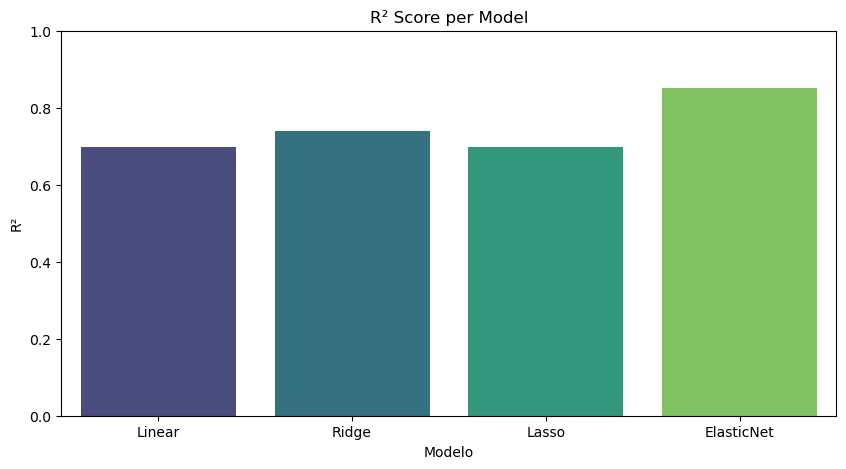

In [75]:

model_names = ['Linear', 'Ridge', 'Lasso', 'ElasticNet']
r2_scores = [0.6967, 0.7386, 0.6988, 0.8508]

plt.figure(figsize=(10, 5))
sns.barplot(x=model_names, y=r2_scores, palette='viridis')

plt.title('R² Score per Model')
plt.ylabel('R²')
plt.ylim(0, 1)  # Como o R² está entre 0 e 1
plt.xlabel('Modelo')
plt.show()


**Above we have the R² results of each model.**

---
### Model selection 

After training and evaluating all regression models, we compared their performance using R² scores:

| Model      | R² Score |
|------------|----------|
| Linear     | 0.6967   |
| Ridge      | 0.7386   |
| Lasso      | 0.6988   |
| ElasticNet | 0.8508   |

The ElasticNet model significantly outperforms the others approximately **85% of the variance** in house prices.

This suggests that ElasticNet — which combines both L1 (Lasso) and L2 (Ridge) regularization — strikes an effective balance between reducing overfitting and capturing complex relationships in the data.

From a business perspective, adopting ElasticNet allows for more accurate and reliable property valuations, reducing pricing errors and improving decision-making confidence in real estate transactions or financial assessments.


##### 📌 Is there Overfitting or Underfitting?

To verify model generalization, we compared performance on both training and test data:

- **R² (Train):** 0.9127
- **R² (Test):** 0.8508


In [77]:
r2_train = elastic_model.score(X_train_scaled, y_train)
r2_test = elastic_model.score(X_test_scaled, y_test)

print("R² train:", r2_train)
print("R² test:", r2_test)


R² train: 0.9127020293544339
R² test: 0.8508269432156741


The small difference between training and testing performance indicates that the ElasticNet model generalizes well to unseen data, with no significant overfitting.

This gives confidence that the model can be safely deployed in real-world applications where future property price predictions are needed.


***Model Training and Evaluation completed*** ✅

## 6. Final Pipeline Implementation 📦

After selecting ElasticNet as the best-performing model, we implemented a full machine learning pipeline. This pipeline integrates both data preprocessing (standardization) and model training, ensuring that future data can be processed and predicted seamlessly.

The pipeline was trained using the entire dataset to maximize learning from all available data. 


In [79]:
from sklearn.pipeline import Pipeline

# Pipeline final
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=10000))
])

pipeline.fit(X, y)
y_pred_pipeline = pipeline.predict(X)


*The final performance metrics*

In [81]:
mae_final = mean_absolute_error(y, y_pred_pipeline)
mse_final = mean_squared_error(y, y_pred_pipeline)
rmse_final = np.sqrt(mse_final)
r2_final = r2_score(y, y_pred_pipeline)

print("MAE (Pipeline):", mae_final)
print("MSE (Pipeline):", mse_final)
print("RMSE (Pipeline):", rmse_final)
print("R² (Pipeline):", r2_final)

MAE (Pipeline): 15462.670558595699
MSE (Pipeline): 583329086.2894785
RMSE (Pipeline): 24152.206654661568
R² (Pipeline): 0.9075077468674699


The final performance metrics are:

- **MAE:** \$15,462  
- **RMSE:** \$24,152  
- **R²:** 0.9075

This means that, on average, the model predicts house prices with an absolute deviation of only ~8.5% relative to the average sale price. Such accuracy is highly valuable for real estate pricing, mortgage risk assessments, and investment decision-making.

The pipeline structure allows easy deployment into production environments or integration into business applications for consistent, automated property valuation.

***Final Pipeline Implementation*** ✅

## 7. Final Conclusion 📜

This project successfully developed a robust machine learning pipeline to predict house sale prices based on various property features.

Starting with an initial Linear Regression model, we iteratively improved performance by experimenting with different regularization techniques (Ridge, Lasso, and ElasticNet). The ElasticNet model ultimately delivered the best results.

By integrating preprocessing and model training into a full pipeline, we achieved:

- **R²:** 0.9075 (explaining ~91% of price variability)
- **MAE:** \$15,462 — representing an average error of only ~8.5% relative to the average house price.

Such predictive accuracy can provide significant business value for real estate agencies, banks, and investment firms by improving price estimation, supporting mortgage decisions, and identifying pricing opportunities.

The pipeline is fully reusable and ready for deployment on future datasets, allowing automated property valuation in production environments.


## Authors

Júlio Silva